### Modeling 

Evaluation Metric: ROC-AUC.

Candidate models: Logistic Regression, Random Forest and SVM.

The baseline approach is to train the three models on the original training data and evaluate the performance on the test set. 

Propose two approaches to deal with the imbalanced dataset and the performance will be compared to the baseline.
1. Implement Logistic Regression, Random Forest and SVM, on the data which is oversampled by SMOTE with class ratio 1:1.
2. Utilize the weighted Random Forest and Weighted SVM on the original imbalanced dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import svm

#### Logistic Regression

Optimization terminated successfully.
         Current function value: 0.137887
         Iterations 13


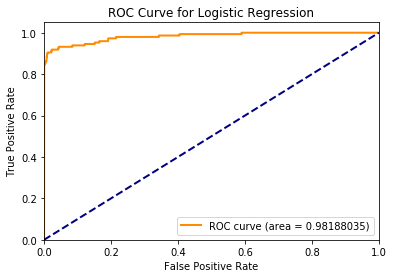

In [46]:
### Logistic Regression  on the oversampled data ###

# Add intercept term
lr_X_train = X_train_smote.copy()
lr_X_train['Intercept'] = 1
lr_X_test = X_test.copy()
lr_X_test['Intercept'] = 1

lr = sm.Logit(y_train_smote, lr_X_train)
lr_result = lr.fit()
# For intepretation , try lr_result.summary2()

# Make prediction and compute ROC_AUC
lr_pred_y = lr_result.predict(lr_X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, lr_pred_y, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Optimization terminated successfully.
         Current function value: 0.004012
         Iterations 13


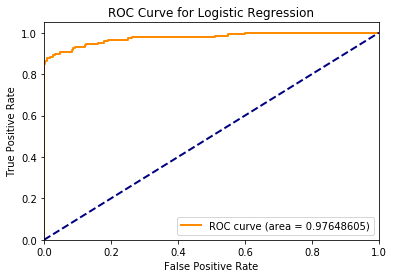

In [47]:
### Logistic Regression on the original data ###

# Add intercept
lr_X_train = X_train.copy()
lr_X_train['Intercept'] = 1
lr_X_test = X_test.copy()
lr_X_test['Intercept'] = 1

lr = sm.Logit(y_train, lr_X_train)
lr_result = lr.fit()
# For intepretation , try lr_result.summary2()

# Make prediction and compute ROC_AUC
lr_pred_y = lr_result.predict(lr_X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, lr_pred_y, pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [7]:
### Random Forest on the oversampled data ###

# Use the random grid to search for best hyperparameters

# Maximum number of levels in tree
max_depth = [2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split
              }

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'roc_auc', 
                               param_distributions = random_grid, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_smote[1:1000], y_train_smote[1:1000])

rf_random.best_params_, rf_random.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished
/Users/weishunji/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


({'max_depth': 5, 'min_samples_split': 5}, 0.9803395443001773)

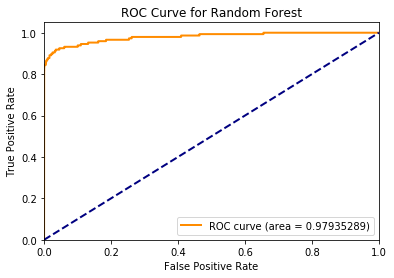

In [50]:
# Fit the Random Forest model on the oversampled data
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 5, 
                            min_samples_split = 10, random_state=0)
rf_result = rf.fit(X_train_smote, y_train_smote)

# Make prediction and compute ROC_AUC
rf_pred_y = rf_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, rf_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

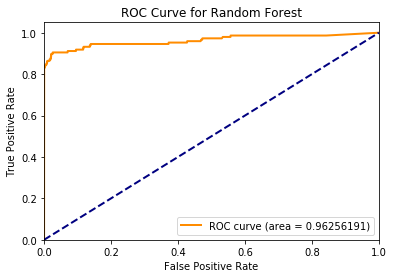

In [52]:
### Random Forest on the original data ###
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, 
                            min_samples_split = 10, random_state=0)
rf_result = rf.fit(X_train, y_train)

# Make prediction and compute ROC_AUC
rf_pred_y = rf_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, rf_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

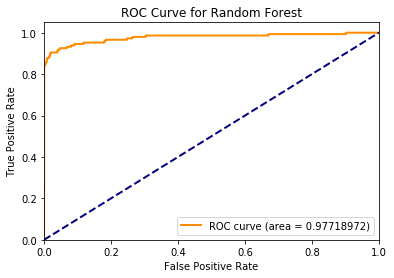

In [53]:
### Weighted Random Forest on the original data ###
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, 
                            min_samples_split = 10, random_state=0, class_weight = 'balanced')
rf_result = rf.fit(X_train, y_train)

# Make prediction and compute ROC_AUC
rf_pred_y = rf_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, rf_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

#### SVM

In [8]:
### SVM on the oversampled data ###

# Tuning paramters

# Cost
Costs = [0.01, 0.1, 1, 10, 100]
# Gamma
Gammas = [0.001, 0.01, 0.1, 1]
# Kernel
Kernels = ['linear', 'poly', 'rbf']

# Create the random grid
random_grid = {'C': Costs,
               'gamma': Gammas,
               'kernel': Kernels,
              }
# Use the random grid to search for best hyperparameters
svm_gridsearch = GridSearchCV(estimator = svm.SVC(), scoring = 'roc_auc', 
                               param_grid = random_grid, 
                               cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svm_gridsearch.fit(X_train_smote[:10000], y_train_smote[:10000])

svm_gridsearch.best_params_, svm_gridsearch.best_score_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   25.4s finished


({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.9902831346089408)

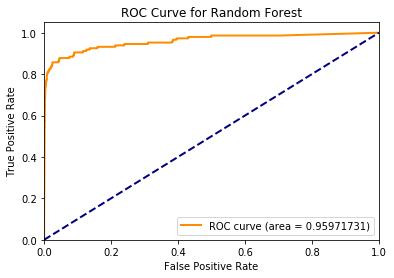

In [17]:
svm_clf = svm.SVC(C = 10, gamma = 0.01, kernel ='rbf', probability = True)
svm_result = svm_clf.fit(X_train_smote[:10000], y_train_smote[:10000])

# Make prediction and compute ROC_AUC
svm_pred_y = svm_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, svm_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Weighted SVM on the original data ###

svm_clf = svm.SVC(C = 10, gamma = 0.01, kernel ='linear', 
                  class_weight = 'balanced', probability = True)
svm_result = svm_clf.fit(X_train, y_train)

# Make prediction and compute ROC_AUC
svm_pred_y = svm_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, svm_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

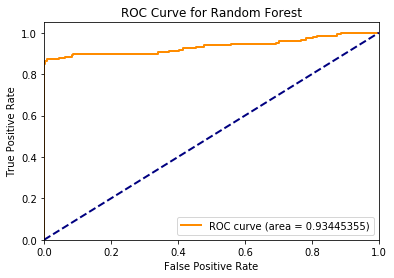

In [10]:
### SVM on the original data ###
svm_clf = svm.SVC(C = 10, gamma = 0.01, kernel ='rbf', probability = True)
svm_result = svm_clf.fit(X_train, y_train)

# Make prediction and compute ROC_AUC
svm_pred_y = svm_result.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, svm_pred_y[:,1], pos_label=2)
roc_auc = metrics.auc(fpr, tpr)

# ROC Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.8f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()